In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt


#Generar una semilla basada en el tiempo actual
seed = int(time.time())  
np.random.seed(seed)

print(f"Semilla utilizada: {seed}")
#np.random.seed(1746913394)


Semilla utilizada: 1746913394


In [2]:
def generate_random_image(size=(64, 64)):
    return np.random.choice([0, 1], size, p=[0.5, 0.5]).astype(np.uint8)


#img = np.load("images.npz")
#images = img["arr_0"]
#tipo = np.load("rng_tipo.npy")
#matrix = np.load("rng_matrix.npy")
#valad1 = np.load("rng_valad1.npy")
#valad2 = np.load("rng_valad2.npy")
#valad3 = np.load("rng_valad3.npy")
#rng_state = (tipo, matrix, valad1, valad2, valad3)
#np.random.set_state(rng_state)

In [3]:

#plt.imshow(images[0], cmap="gray", vmin=0, vmax=255)
#plt.axis("off")  
#plt.title("Primera imagen generada")
#plt.show()


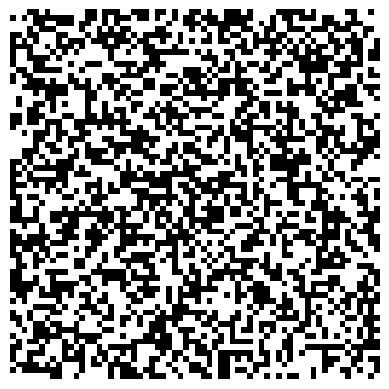

<Figure size 640x480 with 0 Axes>

In [ ]:

images = [generate_random_image() for _ in range(500000)]
#images = np.concatenate((images, new_images))
images0_125 = images[:125000]
images125_250 = images[125000:250000]
images250_375 = images[250000:375000]
images375_500 = images[375000:500001]
rng_state = np.random.get_state()
np.save("rng_tipo.npy", rng_state[0])
np.save("rng_matrix.npy", rng_state[1])
np.save("rng_valad1.npy", rng_state[2])
np.save("rng_valad2.npy", rng_state[3])
np.save("rng_valad3.npy", rng_state[4])
np.savez_compressed("images0_125.npz", images0_125)
np.savez_compressed("images125_250.npz", images125_250)
np.savez_compressed("images250_375.npz", images250_375)
np.savez_compressed("images375_500.npz", images375_500)


plt.imshow(images[0], cmap="gray")
plt.axis("off")


In [5]:
print(len(images))

500000


In [6]:
# Usar un set para guardar las versiones serializadas
hashes = set()
repetido = False

for img in images:
    # Convertimos cada imagen a una tupla inmutable para poder guardarla en un set
    h = hash(img.tobytes())  # También puedes usar tuple(img.flatten()) si prefieres
    if h in hashes:
        repetido = True
        break
    hashes.add(h)

print("Hay imágenes repetidas" if repetido else "Todas las imágenes son únicas")


Todas las imágenes son únicas
